# Q4

import the libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read both images and plot them

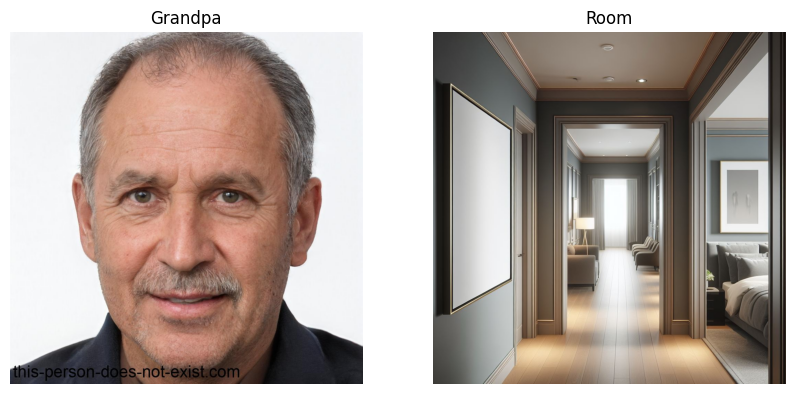

In [2]:
import cv2
import matplotlib.pyplot as plt

# Read the images
img_grandpa = cv2.imread("./images/q4_grandpa.jpeg")
img_room = cv2.imread("./images/q4_room.jpeg")

# Convert the color space
img_grandpa = cv2.cvtColor(img_grandpa, cv2.COLOR_BGR2RGB)
img_room = cv2.cvtColor(img_room, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(10, 8))  # Set the size of the figure

plt.subplot(1, 2, 1)
plt.imshow(img_grandpa)
plt.title('Grandpa')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_room)
plt.title('Room')
plt.axis('off')

# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



add black ribbon to grandpa image

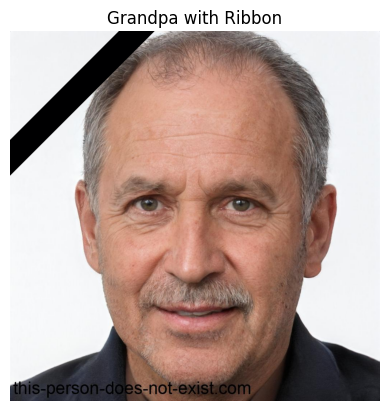

In [3]:
img_copy = img_grandpa.copy()
ribbon_width = 400 
black_ribbon = np.zeros((ribbon_width, ribbon_width, 3), dtype=np.uint8)
black_ribbon[:, :, :] = [0, 0, 0]  # Set color to black

for i in range(ribbon_width):
    for j in range(ribbon_width):
        if i + j > 300 and i + j < 400:
            black_ribbon[i, j] = [0, 0 ,1] 
        else:
            black_ribbon[i, j] = img_grandpa[i, j]  

# Overlay the black ribbon onto the "Grandpa" image
img_copy[:ribbon_width, :ribbon_width, :] = black_ribbon

# Save the image
cv2.imwrite("./images/grandpa_with_ribbon.jpeg", cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR))

# Plot the images
plt.imshow(img_copy)
plt.title('Grandpa with Ribbon')
plt.axis('off')
plt.show()

define the coordinates of destination image

In [4]:
# print(img_copy.shape)

room_copy = img_room.copy()
result = img_room.copy()

#img1 coordinates
point1_1 = (0, 0)
point1_2 = (img_copy.shape[0]-1, 0)
point1_3 = (0, img_copy.shape[1]-1)
point1_4 = (img_copy.shape[0]-1, img_copy.shape[1]-1)

# img2 coordinates ( This loop was for finding the coordinates manually)
print(img_room.shape)
for i in range(img_room.shape[0]):
    for j in range(img_room.shape[1]):
        if i >= 172 and i <= 182 and j >= 59 and j <= 69:
            room_copy [i, j] = [0, 0 ,0]
        if i >= 794 and i <= 804 and j >= 59 and j <= 69:
            room_copy [i, j] = [0, 0 ,0]
        if i >= 285 and i <= 295 and j >= 212 and j <= 222:
            room_copy [i, j] = [0, 0 ,0]
        if i >= 708 and i <= 718 and j >= 212 and j <= 222:
            room_copy [i, j] = [0, 0 ,0]

#img2 coordinates
point2_1 = (59, 170)
point2_2 = (59, 802)
point2_3 = (222, 285)
point2_4 = (222, 718)


# Define source and destination points for perspective transformation
src_points = np.array([point1_1, point1_2, point1_3, point1_4], dtype=np.float32)
dst_points = np.array([point2_1, point2_3, point2_2, point2_4], dtype=np.float32)



(1024, 1024, 3)


get the transform matrix

In [5]:
# Compute perspective transformation matrix
M = cv2.getPerspectiveTransform(src_points, dst_points)


apply the transform and plot the result

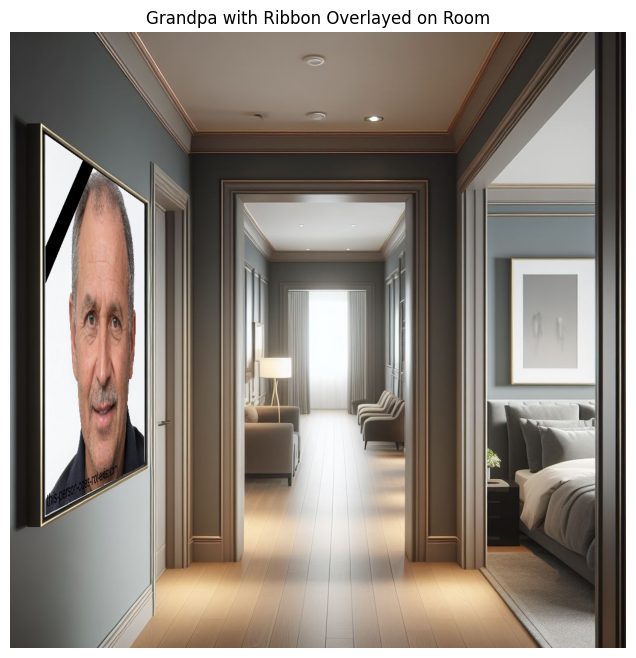

True

In [6]:
# Apply perspective transformation to the "Grandpa" image
transformed_grandpa = cv2.warpPerspective(img_copy, M, (img_room.shape[0], img_room.shape[1]))


# Place transformed grandpa on the left wall of the room 
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if np.any(transformed_grandpa[i, j] != [0, 0, 0]):
            result[i, j] = transformed_grandpa[i, j]


# Another way for placing grandpa on the wall => decreases the intesity
# # Overlay the transformed "Grandpa" image onto the "Room" image
# alpha = 0.6  # Transparency factor for blending
# result = cv2.addWeighted(result, 1 - alpha, transformed_grandpa, alpha, 0)


# Plot the result
plt.figure(figsize=(10, 8))
plt.imshow(result)
plt.title('Grandpa with Ribbon Overlayed on Room')
plt.axis('off')
plt.show()
cv2.imwrite("./images/grandpa_on_wall.jpeg", cv2.cvtColor(result, cv2.COLOR_RGB2BGR))